In [13]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [14]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [15]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [16]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [17]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
column_names = df_market_data.columns.tolist()
data_values = df_market_data.values

scaler = StandardScaler()
scaled_df_market_data = scaler.fit_transform(data_values)

In [18]:
# Create a DataFrame with the scaled data

scaled_df = pd.DataFrame(scaled_df_market_data, columns=column_names)

# Copy the crypto names from the original data

crypto_coin_ids = df_market_data.index

# Set the coinid column as index

scaled_df.set_index(crypto_coin_ids, inplace=True)

# Display sample data
scaled_df.head(6)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533


---

### Find the Best Value for k Using the Original Data.

In [19]:
# Create a list with the number of k-values from 1 to 11
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [20]:
# Create an empty list to store the inertia values

inertia_values = list()
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 12):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(scaled_df)
    inertia_values.append(kmeans_model.inertia_)


In [21]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)



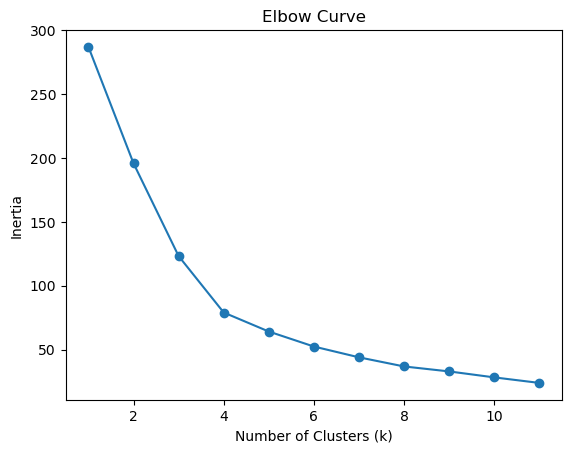

In [22]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:As given from the elbow curve, as the elbow is formed at 4, therefore, the best value of k in this case is 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [43]:
# Initialize the K-Means model using the best value for k
kmeans_optimal = KMeans(n_clusters=4)

In [44]:
# Fit the K-Means model using the scaled data
kmeans_optimal.fit(scaled_df)

KMeans(n_clusters=4)

In [45]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_optimal.fit_predict(scaled_df)


# Print the resulting array of cluster values.
print(cluster_labels)

[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 2 3 1 1 0
 1 1 1 1]


In [46]:
# Create a copy of the DataFrame
scaled_df_copy = scaled_df.copy()

In [47]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df_copy['predicted_cluster'] = cluster_labels

# Display sample data
scaled_df_copy.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [48]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = scaled_df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_cluster",
    cmap="viridis",
    hover_cols=["crypto_name"]
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [49]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)
pca

PCA(n_components=3)

In [50]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
scaled_df_copy_pca = pca.fit_transform(scaled_df_copy)
scaled_df_copy_pca_df = pd.DataFrame(scaled_df_copy_pca, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame.
scaled_df_copy_pca_df.head(5)

,PC1,PC2,PC3
0,-1.179268,0.855903,0.777751
1,-1.011506,0.610059,1.284749
2,-0.107656,-0.486176,-0.879841
3,-0.150005,-0.531266,-0.751847
4,-2.222776,1.927124,1.418177


In [51]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
explained_variance_df

,Explained Variance
0,0.337017
1,0.313467
2,0.234121


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:The total explained variance of 3 principal components is 0.889153 

In [52]:
# Create a new DataFrame with the PCA data.
df_market_data_pca = scaled_df_copy_pca_df


# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
crypto_names = scaled_df_copy.index

# Set the coinid column as index

df_market_data_pca.set_index(crypto_names, inplace=True)

df_market_data_pca.head(5)
# Display sample data


,PC1,PC2,PC3
coin_id,,,
bitcoin,-1.179268,0.855903,0.777751
ethereum,-1.011506,0.610059,1.284749
tether,-0.107656,-0.486176,-0.879841
ripple,-0.150005,-0.531266,-0.751847
bitcoin-cash,-2.222776,1.927124,1.418177


---

### Find the Best Value for k Using the PCA Data

In [53]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [54]:
# Create an empty list to store the inertia values

inertia_values = list()
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 12):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_market_data_pca)
    inertia_values.append(kmeans_model.inertia_)

In [55]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

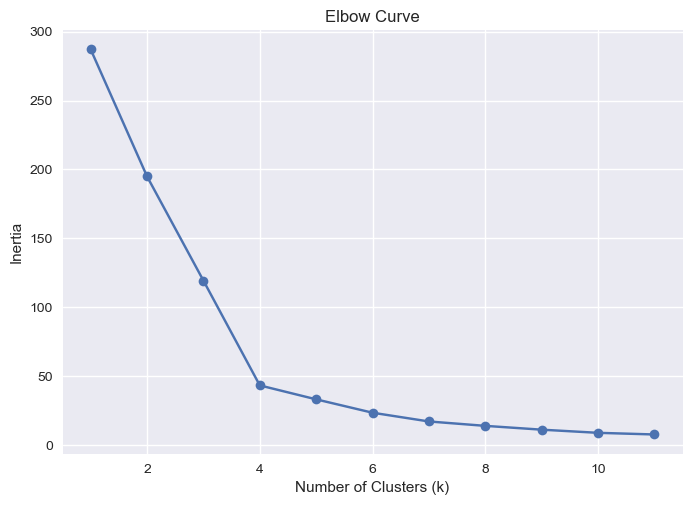

In [56]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:Does it differ from the best k value found using the original data?


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: No 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [57]:
# Initialize the K-Means model using the best value for k
kmeans_best = KMeans(n_clusters=4)

In [58]:
# Fit the K-Means model using the PCA data
kmeans_best.fit(df_market_data_pca)

KMeans(n_clusters=4)

In [59]:
# Predict the clusters to group the cryptocurrencies using the PCA data
kmeans_best.fit_predict(df_market_data_pca)

# Print the resulting array of cluster values.
cluster_labels_data_pca = kmeans_optimal.fit_predict(df_market_data_pca)
print(cluster_labels_data_pca)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [60]:
# Create a copy of the DataFrame with the PCA data
df_market_data_pca_copy = df_market_data_pca.copy()


# Add a new column to the DataFrame with the predicted clusters

df_market_data_pca_copy['predicted_cluster'] = cluster_labels_data_pca

# Display sample data
df_market_data_pca_copy.head(5)

,PC1,PC2,PC3,predicted_cluster
coin_id,,,,
bitcoin,-1.179268,0.855903,0.777751,2
ethereum,-1.011506,0.610059,1.284749,2
tether,-0.107656,-0.486176,-0.879841,0
ripple,-0.150005,-0.531266,-0.751847,0
bitcoin-cash,-2.222776,1.927124,1.418177,2


In [61]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data_pca_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="predicted_cluster",
    cmap="viridis",
    hover_cols=["crypto_name"]
)

scatter_plot

:Scatter   [PC1]   (PC2,predicted_cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

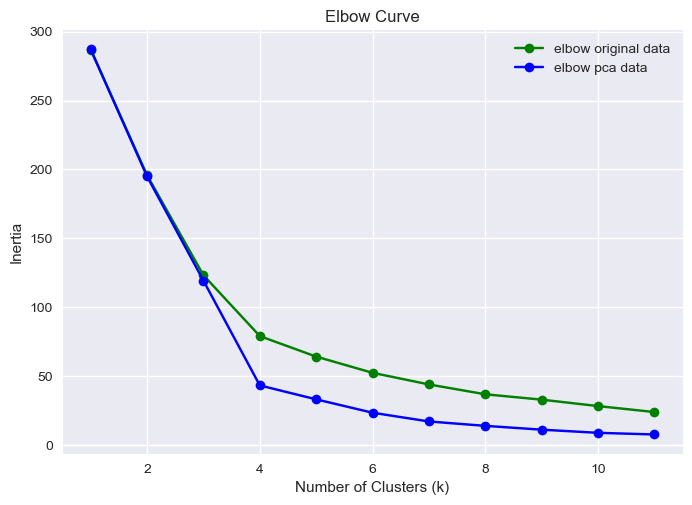

In [62]:
# Composite plot to contrast the Elbow curves
plt.style.use('seaborn')
k_values_original = elbow_df['k']
inertia_values_original = elbow_df['inertia']

k_values_pca = elbow_df_pca['k']
inertia_values_pca = elbow_df_pca['inertia']

fig, ax = plt.subplots()
ax.plot(k_values_original, inertia_values_original, marker='o', color='g',
        label='elbow original data')
ax.plot(k_values_pca, inertia_values_pca, marker='o', color='b',
        label='elbow pca data')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Inertia')
ax.set_title('Elbow Curve')
ax.legend()
plt.show()

In [64]:
df_cluster_labels_pca = pd.DataFrame({'Label':cluster_labels_data_pca})
df_clsuter_labels = pd.DataFrame({'Label':cluster_labels})

labels = df_market_data_pca_copy.predicted_cluster
labels_original = scaled_df_copy.predicted_cluster

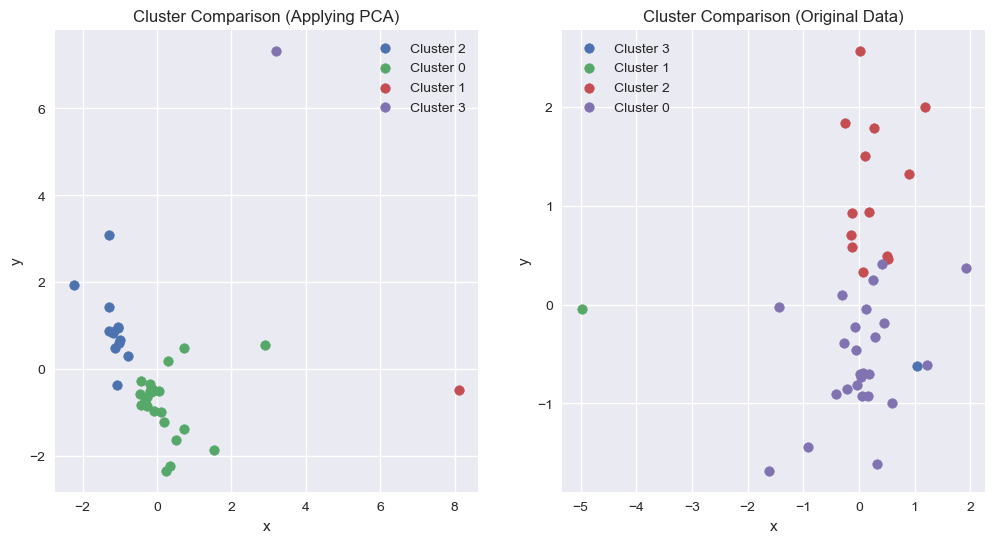

In [65]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax1 = ax[0]
for cluster_label in df_cluster_labels_pca.Label.unique():
    cluster_data = df_market_data_pca_copy[labels == cluster_label]

    ax1.scatter(cluster_data['PC1'],
                cluster_data['PC2'],
                label=f'Cluster {cluster_label}')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Cluster Comparison (Applying PCA)')
ax1.legend()

ax2 = ax[1]
for cluster_label in df_clsuter_labels.Label.unique():
    cluster_data = scaled_df_copy[labels == cluster_label]

    ax2.scatter(cluster_data['price_change_percentage_24h'],
               cluster_data['price_change_percentage_7d'],
               label=f'Cluster {cluster_label}')

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Cluster Comparison (Original Data)')

ax2.legend()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:After visualizing the cluster analysis results, it can be seen that clsuters tend to be more precise and to the point using PCA. PCA redueces the dimensionality of original data and only includes those features that matter the most.